## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df=pd.merge(mouse_metadata, study_results, on ='Mouse ID', how='inner')
# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


mouse_metadata.head()

In [2]:
# Checking the number of mice.
mousecount = len (mousestudy_df['Mouse ID'].drop_duplicates())
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_df['combined']=mousestudy_df['Mouse ID'] + mousestudy_df['Timepoint'].astype(str)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousestudy_df.drop_duplicates(subset=['combined'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mousecount = len (mousestudy_df['Timepoint'].drop_duplicates())
mousecount


10

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousecount = len (mousestudy_df['Mouse ID'].drop_duplicates())
mousecount

249

In [7]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor1=mousestudy_df[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor2 = tumor1.groupby(['Drug Regimen'])
tumormean = (tumor2.mean())
tumormean =tumormean.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Mean'})
tumor3=mousestudy_df[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor4 = tumor3.groupby(['Drug Regimen'])
tumormedian = (tumor4.median())
tumormedian =tumormedian.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Median'})
tumorjoin1=pd.merge(tumormean, tumormedian, on = 'Drug Regimen', how='inner')
#tumor5=mousestudy_df[['Drug Regimen', 'Tumor Volume (mm3)']]
#tumor6 = tumor5.groupby(['Drug Regimen'])
#tumormode = sts.mode(tumor5('Tumor Volume (mm3)'))

#tumor5=sts.mode(tumor1['Tumor Volume (mm3)'])
#tumor5=(tumor1['Tumor Volume (mm3)'].mode())
#mode_scipy = sts.mode(temperatures)
tumorjoin1
#tumormode

,Tumor Volume Mean,Tumor Volume Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.322552,50.854632
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

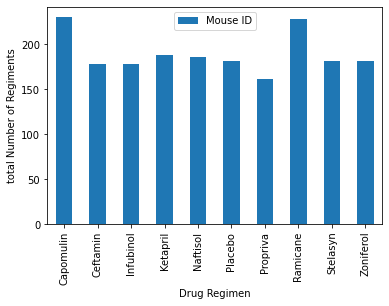

<Figure size 432x288 with 0 Axes>

In [99]:
treat=mousestudy_df[['Drug Regimen', 'Mouse ID']]
treatment1 = treat.groupby(['Drug Regimen'])
treatment = (treatment1.count())
treatment
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_chart = treatment.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('total Number of Regiments')
plt.show()
plt.tight_layout()

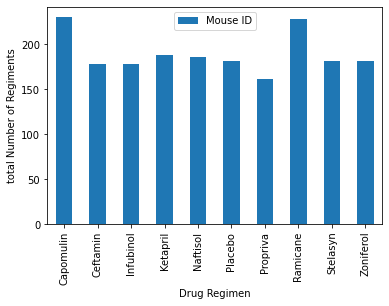

<Figure size 432x288 with 0 Axes>

In [100]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_chart = treatment.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('total Number of Regiments')
plt.show()
plt.tight_layout()


ValueError: x must be 1D

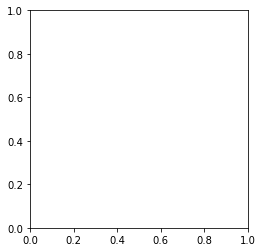

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf=mousestudy_df[['Drug Regimen', 'Sex']]
sex1 = mf.groupby(['Sex'])
sex = (sex1.count())

plt.pie(sex, 
        autopct="%1.1f%%", shadow=True, startangle=140)


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
